<a href="https://colab.research.google.com/github/guptankit005/Analytics/blob/master/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine

Support vector machines (SVMs) are supervised learning methods used for classification, regression and outliers detection.

The idea behind SVM is to generate the best decision boundary which can segregate our data points into classes or category. The best decision boundary is called a hyperplane.

In SVM,each data row (with n feature values) is plotted as a point in n-dimensional space with the value of each feature representing the value of a particular coordinate. Then, we try to find a hyper-plane which can optimally differentiate classes.

Here the goal is to maximizing the distances between hyper-plane and the nearest data point. This distance is known as Margin.

In [19]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data 

In [20]:
#importing data from sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

#converting data into pandas dataframe
canc_data = pd.DataFrame(data.data, columns=data.feature_names)

#adding target field to the dataset
canc_data['target'] = pd.Series(data.target)

In [21]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [22]:
#printing first five rows of data
#canc_data.head()

#checking information about all the columns
#canc_data.info()

#checking basic statistical distribution of data
#canc_data.describe().transpose()

#checking for null values
#canc_data.isnull().sum()

#checking for duplicate rows
#canc_data.duplicated().sum()

canc_data['target'].value_counts()
#value count to see if data is balanced or imbalanced.

1    357
0    212
Name: target, dtype: int64

In [23]:
#creating X and y
X_feature = list(canc_data.columns)
X_feature.remove('target')

X = canc_data[X_feature]
y = canc_data['target']

In [24]:
#splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [25]:
#support vector classification model
from sklearn.svm import SVC
model_svclinear = SVC(kernel = "linear",C=1,gamma='auto',probability=False).fit(X_train,y_train)

In [26]:
#predicting for our test data
y_pred = model_svclinear.predict(X_test)

In [27]:
#generating classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        69
           1       0.95      0.97      0.96       102

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [28]:
#importing libraries to check model performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import metrics

In [29]:
print("Accuracy score on test: " , round((model_svclinear.score(X_test, y_test)),3))
print("Accuracy score on train: ", round((model_svclinear.score(X_train, y_train)),3))

#printing log loss for the model
print('log_loss : ', log_loss(y_test, y_pred))

Accuracy score on test:  0.953
Accuracy score on train:  0.967
log_loss :  1.6158725681078165


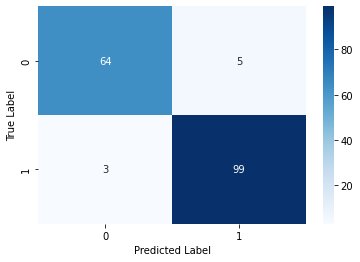

In [30]:
#generating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()